In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "demiminjarez"
os.environ['KAGGLE_KEY'] = "71118f339b2ffe1143d9fec6ed72ebf7"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [ ]:
from fastai.tabular.all import *

In [ ]:
!kaggle datasets download -d saisatish09/insuranceclaimsdata





Dataset URL: https://www.kaggle.com/datasets/saisatish09/insuranceclaimsdata
License(s): unknown
insuranceclaimsdata.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
os.listdir()

['.config', 'insuranceclaimsdata.zip', 'insuranceclaimsdata', 'sample_data']

In [ ]:
# Unzip the downloaded file
!unzip -o insuranceclaimsdata.zip -d insuranceclaimsdata


Archive:  insuranceclaimsdata.zip
  inflating: insuranceclaimsdata/AutoBi.csv  
  inflating: insuranceclaimsdata/AutoClaims.csv  
  inflating: insuranceclaimsdata/AutoCollision.csv  
  inflating: insuranceclaimsdata/ClaimsLong.csv  
  inflating: insuranceclaimsdata/IndustryAuto.csv  
  inflating: insuranceclaimsdata/SingaporeAuto.csv  
  inflating: insuranceclaimsdata/Thirdparty.csv  
  inflating: insuranceclaimsdata/WorkersComp.csv  
  inflating: insuranceclaimsdata/dataCar.csv  
  inflating: insuranceclaimsdata/dataOhlsson.csv  


In [ ]:
import os

In [ ]:
import pandas as pd

In [ ]:
os.listdir()

['.config', 'insuranceclaimsdata.zip', 'insuranceclaimsdata', 'sample_data']

In [ ]:
def load_csv(filename):
    current_dir = os.getcwd()
    csv_path = os.path.join(current_dir, 'insuranceclaimsdata', filename)
    return pd.read_csv(csv_path)


In [ ]:
# Load the datasets
df_motorcycle = load_csv('dataOhlsson.csv')

In [ ]:
df_motorcycle.head()

,Index,agarald,kon,zon,mcklass,fordald,bonuskl,duration,antskad,skadkost
0,1,0,M,1,4,12,1,0.175342,0,0
1,2,4,M,3,6,9,1,0.000000,0,0
2,3,5,K,3,3,18,1,0.454795,0,0
3,4,5,K,4,1,25,1,0.172603,0,0
4,5,6,K,2,1,26,1,0.180822,0,0


In [ ]:
df_motorcycle.rename(columns={'agarald': 'age_num'}, inplace=True)
df_motorcycle.rename(columns={'kon': 'age_factor'}, inplace=True)
df_motorcycle.rename(columns={'zon': 'zone'}, inplace=True)
df_motorcycle.rename(columns={'mcklass': 'mk_class'}, inplace=True)
df_motorcycle.rename(columns={'fordald':'vehicle_age'}, inplace=True)
df_motorcycle.rename(columns={'bonuskl': 'bonus_class'}, inplace=True)
df_motorcycle.rename(columns={'antskad': 'claims_num'}, inplace=True)
df_motorcycle.rename(columns={'skadkost': 'claim_cost'}, inplace=True)

In [ ]:
df_motorcycle.head()

,Index,age_num,age_factor,zone,mk_class,vehicle_age,bonus_class,duration,claims_num,claim_cost
0,1,0,M,1,4,12,1,0.175342,0,0
1,2,4,M,3,6,9,1,0.000000,0,0
2,3,5,K,3,3,18,1,0.454795,0,0
3,4,5,K,4,1,25,1,0.172603,0,0
4,5,6,K,2,1,26,1,0.180822,0,0


In [ ]:
average_claim_cost = df_motorcycle['claim_cost'].mean()
print(f"The average claim cost is: ${average_claim_cost:.2f}")

The average claim cost is: $264.02


In [ ]:
average_age = df_motorcycle['age_num'].mean()
print(f"The average age: {average_age:.2f}")

The average age: 42.42


In [ ]:
average_vehicle_age = df_motorcycle['vehicle_age'].mean()
print(f"The average vehicle age: {average_vehicle_age:.2f}")

The average vehicle age: 12.54


In [ ]:
missing_values = df_motorcycle.isnull().sum()
missing_values

,0
Index,0
age_num,0
age_factor,0
zone,0
mk_class,0
vehicle_age,0
bonus_class,0
duration,0
claims_num,0
claim_cost,0


In [ ]:
df_motorcycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64548 entries, 0 to 64547
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index        64548 non-null  int64  
 1   age_num      64548 non-null  int64  
 2   age_factor   64548 non-null  object 
 3   zone         64548 non-null  int64  
 4   mk_class     64548 non-null  int64  
 5   vehicle_age  64548 non-null  int64  
 6   bonus_class  64548 non-null  int64  
 7   duration     64548 non-null  float64
 8   claims_num   64548 non-null  int64  
 9   claim_cost   64548 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 4.9+ MB


In [ ]:
# Mapping strings to numbers for the 'age_factor' column
make_mapping = {
    'K': 1,
    'M': 2
}

df_motorcycle['age_factor'] = df_motorcycle['age_factor'].replace(make_mapping)

<ipython-input-68-0ad55d9c1f35>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_motorcycle['age_factor'] = df_motorcycle['age_factor'].replace(make_mapping)


In [ ]:
correlation_matrix = df_motorcycle.corr()

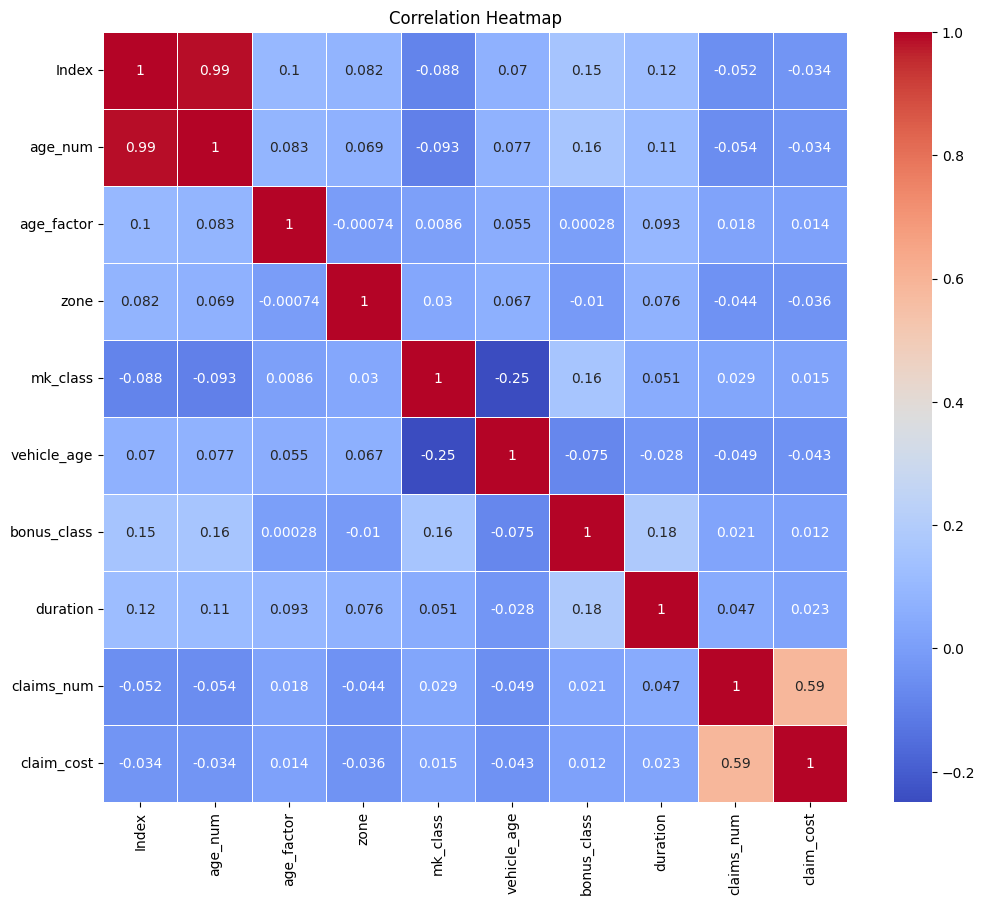

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Display summary statistics of the cleaned dataset
print("\nSummary statistics of the cleaned dataset:")
print(df_motorcycle.describe())


Summary statistics of the cleaned dataset:
              Index       age_num    age_factor          zone      mk_class  \
count  64548.000000  64548.000000  64548.000000  64548.000000  64548.000000   
mean   32274.500000     42.416062      1.847354      3.213113      3.700053   
std    18633.546925     12.980960      0.359649      1.354591      1.523921   
min        1.000000      0.000000      1.000000      1.000000      1.000000   
25%    16137.750000     31.000000      2.000000      2.000000      3.000000   
50%    32274.500000     44.000000      2.000000      3.000000      4.000000   
75%    48411.250000     52.000000      2.000000      4.000000      5.000000   
max    64548.000000     92.000000      2.000000      7.000000      7.000000   

        vehicle_age   bonus_class      duration    claims_num     claim_cost  
count  64548.000000  64548.000000  64548.000000  64548.000000   64548.000000  
mean      12.540063      4.024571      1.010671      0.010798     264.017785  
std    

In [ ]:
correlation_matrix = df_motorcycle.corr()

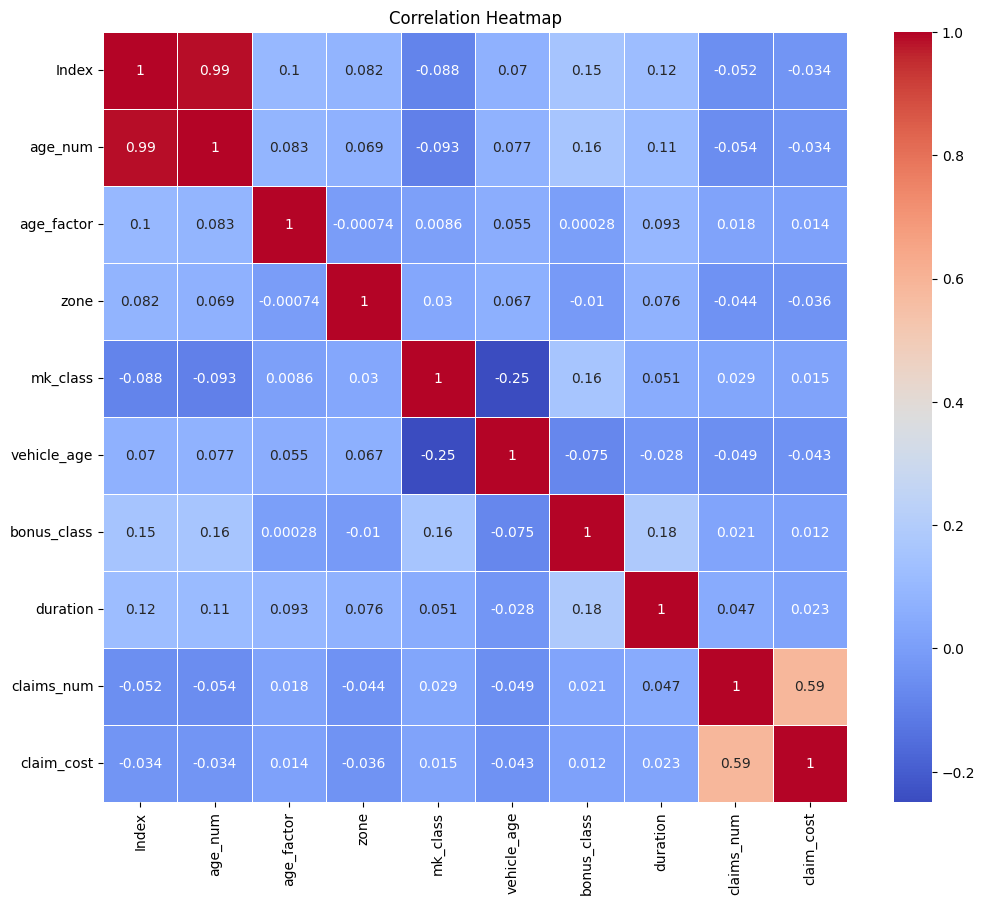

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 6. Correlation with target variable
correlation_with_target = correlation_matrix['claim_cost'].sort_values(ascending=False)
print("Correlation with target variable (LOSS):")
print(correlation_with_target)

Correlation with target variable (LOSS):
claim_cost     1.000000
claims_num     0.586043
duration       0.022770
mk_class       0.015260
age_factor     0.013662
bonus_class    0.011789
Index         -0.033838
age_num       -0.033894
zone          -0.035744
vehicle_age   -0.043310
Name: claim_cost, dtype: float64


<Figure size 1000x600 with 0 Axes>

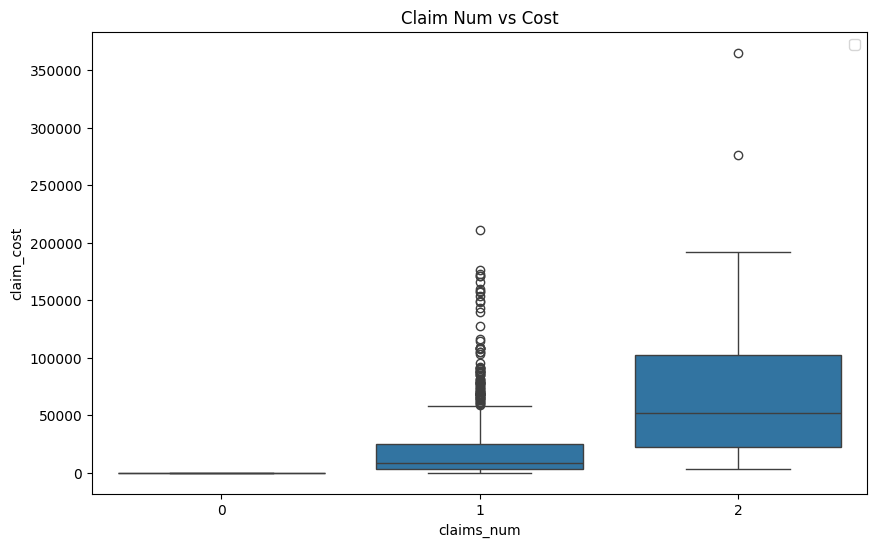

In [ ]:
# 8. Analyze the relationship between insurance claim amount and loss
plt.figure(figsize=(10, 6))

# Box plot of LOSS by Insured status
plt.figure(figsize=(10, 6))
sns.boxplot(x='claims_num', y='claim_cost', data=df_motorcycle)
plt.title('Claim Num vs Cost')

plt.xlabel('claims_num')
plt.ylabel('claim_cost')

# Add a legend
plt.legend()
plt.show()

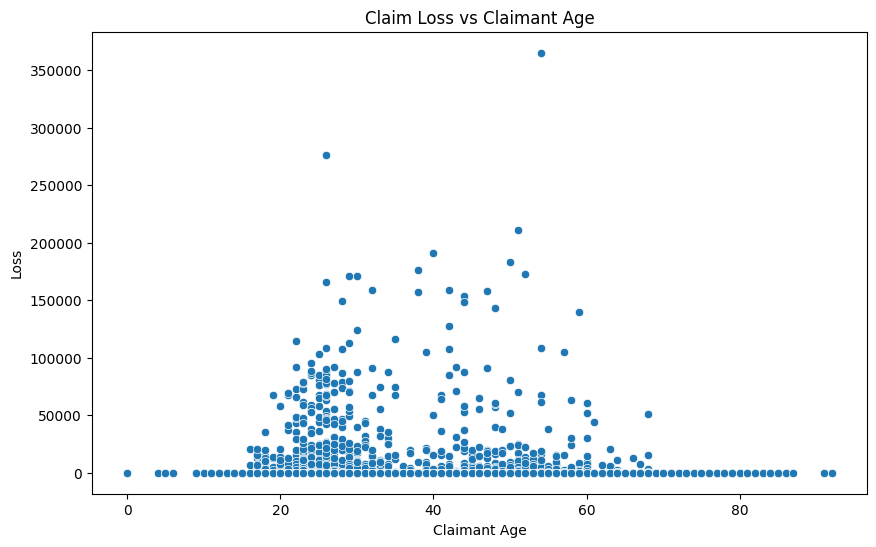

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_num', y='claim_cost', data=df_motorcycle)
plt.title('Claim Loss vs Claimant Age')
plt.xlabel('Claimant Age')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Define categorical and continuous variables
cat_names = ['age_factor', 'zone', 'mk_class']
cont_names = ['age_num', 'vehicle_age', 'bonus_class', 'duration', 'claims_num']

In [ ]:
# Define the target
dep_var = 'claim_cost'

# Define preprocessing steps
procs = [Categorify, FillMissing, Normalize]

# Create TabularPandas object
to = TabularPandas(df_motorcycle, procs, cat_names, cont_names, y_names=dep_var, splits=RandomSplitter(valid_pct=0.2)(range_of(df_motorcycle)))

# Create DataLoaders
dls = to.dataloaders(bs=64)

In [ ]:
# View the normalized training data
normalized_df = to.train.xs  # xs contains the features (categorical and continuous)
print(normalized_df.head())  # Display the first few rows

       age_factor  zone  mk_class   age_num  vehicle_age  bonus_class  \
52510           2     4         3  0.894152     1.496493     1.258548   
18487           2     1         5 -0.724330     0.464282     1.258548   
55717           1     4         3  1.125364     0.567503     1.258548   
22226           1     4         1 -0.416047    -0.155045     1.258548   
41759           2     5         3  0.431729     0.154619    -0.010428   

       duration  claims_num  
52510 -0.010218    -0.10129  
18487 -0.708362    -0.10129  
55717 -0.173258    -0.10129  
22226 -0.010218    -0.10129  
41759 -0.392734    -0.10129  


In [ ]:
# Define RMSLE
from fastai.metrics import Metric
import torch

class RMSLE(Metric):
    def __init__(self):
        self.reset()

    def reset(self):
        self.sum = 0.0
        self.count = 0

    def accumulate(self, learn):
        pred = torch.clamp(learn.pred, min=0)  # Clamp predictions to avoid negative values
        targ = learn.y
        self.sum += torch.sum((torch.log1p(pred) - torch.log1p(targ))**2).item()
        self.count += targ.shape[0]

    @property
    def value(self):
        return (self.sum / self.count) ** 0.5 if self.count > 0 else None


In [ ]:
%time
# Define the learner using Fastai's tabular_learner
# For this regression task where we predict continuous values, rmse is a good metric
learn = tabular_learner(dls, layers=[200, 100], metrics=rmse)


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs


In [ ]:
%%time
# Train the model for 5 epochs with a learning rate of 1e-2
learn.fit_one_cycle(5, 2e-2)

epoch,train_loss,valid_loss,_rmse,time
0,25021986.000000,4753441280.000000,68945.210938,00:10
1,14921583.000000,3872261376.000000,62227.488281,00:10
2,11509226.000000,24390936.000000,4938.718262,00:11
3,13749622.000000,59543276.000000,7716.429199,00:10
4,10186626.000000,786561472.000000,28045.693359,00:11


CPU times: user 53 s, sys: 370 ms, total: 53.4 s
Wall time: 54.3 s
